<a href="https://colab.research.google.com/github/KrishGuptareal/Inter_IIT_material/blob/main/TDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.0 MB/s eta 0:00:00


In [2]:
import numpy as np

In [3]:
t = np.linspace(0, 2 * np.pi, 100)

In [22]:
x = 5 * np.cos(t) + np.random.normal(0, 0.1, 100) # Add noise
y = 5 * np.sin(t) + np.random.normal(0, 0.1, 100) # Add noise
x1 = 5 * np.cos(t) + np.random.normal(0, 0.1, 100) +100# Add noise
y1 = 5 * np.sin(t) + np.random.normal(0, 0.1, 100)  +100# Add noise

In [28]:
point_cloud1 = np.stack((x, y), axis=1)
point_cloud2 = np.stack((x1,y1),axis=1)
point_cloud=np.vstack((point_cloud,point_cloud2))

In [24]:
import gudhi as gd
import matplotlib.pyplot as plt


In [25]:
def compute_persistent_homology(point_cloud, max_dimension=1, max_edge_length=1.0):
    """
    Computes the Persistent Homology (PH) of a point cloud using the Rips complex.

    Args:
        point_cloud (np.ndarray): The input N-by-D numpy array of points.
        max_dimension (int): The maximum homology dimension to compute (e.g., 1 for loops, 2 for voids).
        max_edge_length (float): The maximum radius (epsilon) for the filtration.

    Returns:
        np.ndarray: The persistence diagram (birth, death, dimension) for each feature.
    """

    # 1. Create a Rips Complex
    # The Rips complex is a way to build the filtration from a point cloud.
    # It constructs a simplicial complex where every set of points
    # whose pairwise distance is less than 'max_edge_length' forms a simplex.
    rips_complex = gd.RipsComplex(
        points=point_cloud,
        max_edge_length=max_edge_length
    )

    # 2. Create the Simplicial Complex Filtration
    # This generates the sequence of nested topological spaces.
    simplex_tree = rips_complex.create_simplex_tree(
        max_dimension=max_dimension
    )

    # 3. Compute Persistent Homology
    # This calculates the birth and death times for all homology features.
    persistence = simplex_tree.persistence()

    # 4. Plot the Persistence Diagram (Optional but recommended)
    gd.plot_persistence_diagram(persistence)
    plt.title("Persistence Diagram")
    plt.show()

    # Return the raw persistence pairs
    return persistence

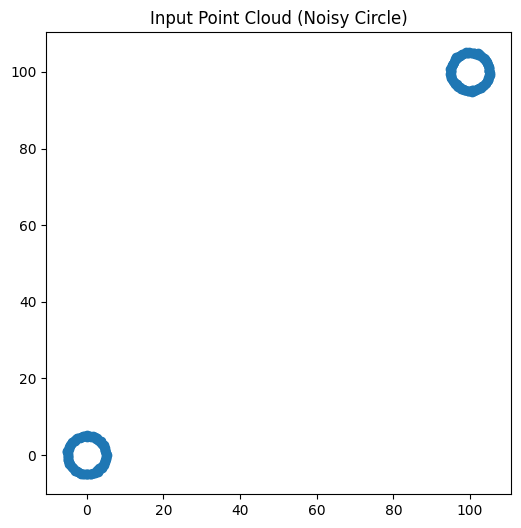

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])
plt.title("Input Point Cloud (Noisy Circle)")
plt.axis('equal')
plt.show()

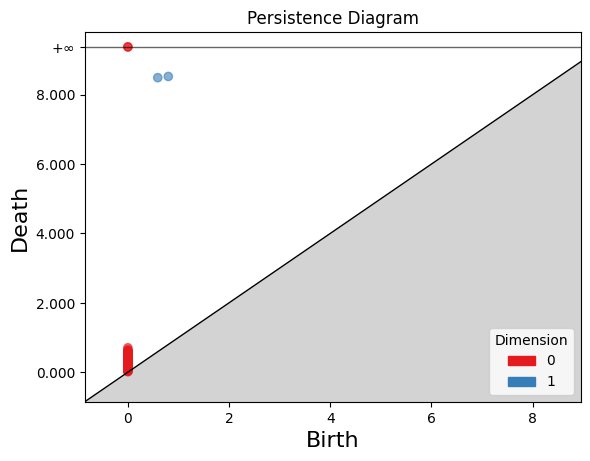


--- Persistence Diagram Features (Dimension, Birth, Death) ---
Dim: 1, Birth: 0.590, Death: 8.492, Persistence: 7.902 (SIGNIFICANT)
Dim: 1, Birth: 0.799, Death: 8.526, Persistence: 7.727 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.000, Persistence: inf (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.000, Persistence: inf (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.702, Persistence: 0.702 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.637, Persistence: 0.637 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.628, Persistence: 0.628 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.609, Persistence: 0.609 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.587, Persistence: 0.587 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.586, Persistence: 0.586 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.579, Persistence: 0.579 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.569, Persistence: 0.569 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.567, Persistence: 0.567 (SIGNIFICANT)
Dim: 0, Birth: 0.000, Death: 0.549, Persist

In [30]:
# Run the corrected function
persistence_data = compute_persistent_homology(
    point_cloud=point_cloud,
    max_dimension=2,
    max_edge_length=10.0
)

print("\n--- Persistence Diagram Features (Dimension, Birth, Death) ---")
# Loop through the list of (dimension, (birth, death)) tuples
for dim, (birth, death) in persistence_data:
    if np.isinf(death): # Handle infinite death times (H_0 features)
        death = birth
        persistence_value = np.inf
    else:
        persistence_value = death - birth

    if persistence_value > 0.5: # Threshold for significant features
        print(f"Dim: {int(dim)}, Birth: {birth:.3f}, Death: {death:.3f}, Persistence: {persistence_value:.3f} (SIGNIFICANT)")
    else:
        print(f"Dim: {int(dim)}, Birth: {birth:.3f}, Death: {death:.3f}, Persistence: {persistence_value:.3f} (Noise)")